# STEP1 FRAME PROBLEM: prediction model for predicting Price.

# STEP2 COLECT READ DATA
import pandas as pd
df=pd.read_csv('ToyotaCorolla.csv',encoding='latin1')

In [20]:
# STEP 3 EXPLORATORY DATA ANNALYSIS
df.head()
df.shape

(1435, 9)

In [21]:
df=df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
df

KeyError: "['Age_08_04', 'cc', 'Quarterly_Tax'] not in index"

In [22]:
df=df.rename({'Age_08_04':'AGE','cc':'CC','Quarterly_Tax':'QT'},axis=1)
df

,Price,AGE,KM,HP,CC,Doors,Gears,QT,Weight
0,12950,23,71138,69,1900,3,5,185,1105
1,6950,43,243000,69,1900,3,5,185,1110
2,11950,40,161000,69,1900,3,5,185,1105
3,4350,44,158320,69,1800,5,5,64,1110
4,4750,44,131273,69,1800,5,5,64,1110
...,...,...,...,...,...,...,...,...,...
1431,22000,28,18739,192,1800,3,6,100,1185
1432,22750,30,34000,192,1800,3,5,100,1185
1433,21950,31,64982,192,1800,5,6,100,1195
1434,21950,27,49866,192,1800,5,5,100,1195


In [23]:
df.describe()

,Price,AGE,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1435 non-null   int64
 1   AGE     1435 non-null   int64
 2   KM      1435 non-null   int64
 3   HP      1435 non-null   int64
 4   CC      1435 non-null   int64
 5   Doors   1435 non-null   int64
 6   Gears   1435 non-null   int64
 7   QT      1435 non-null   int64
 8   Weight  1435 non-null   int64
dtypes: int64(9)
memory usage: 144.4 KB


In [25]:
df.isnull().sum()

Price     0
AGE       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

In [8]:
df[df.duplicated()]

,Price,AGE,KM,HP,CC,Doors,Gears,QT,Weight
1420,24950,8,13253,116,2000,5,5,234,1320


In [9]:
df=df.drop_duplicates()

In [10]:
df.corr()

,Price,AGE,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
AGE,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


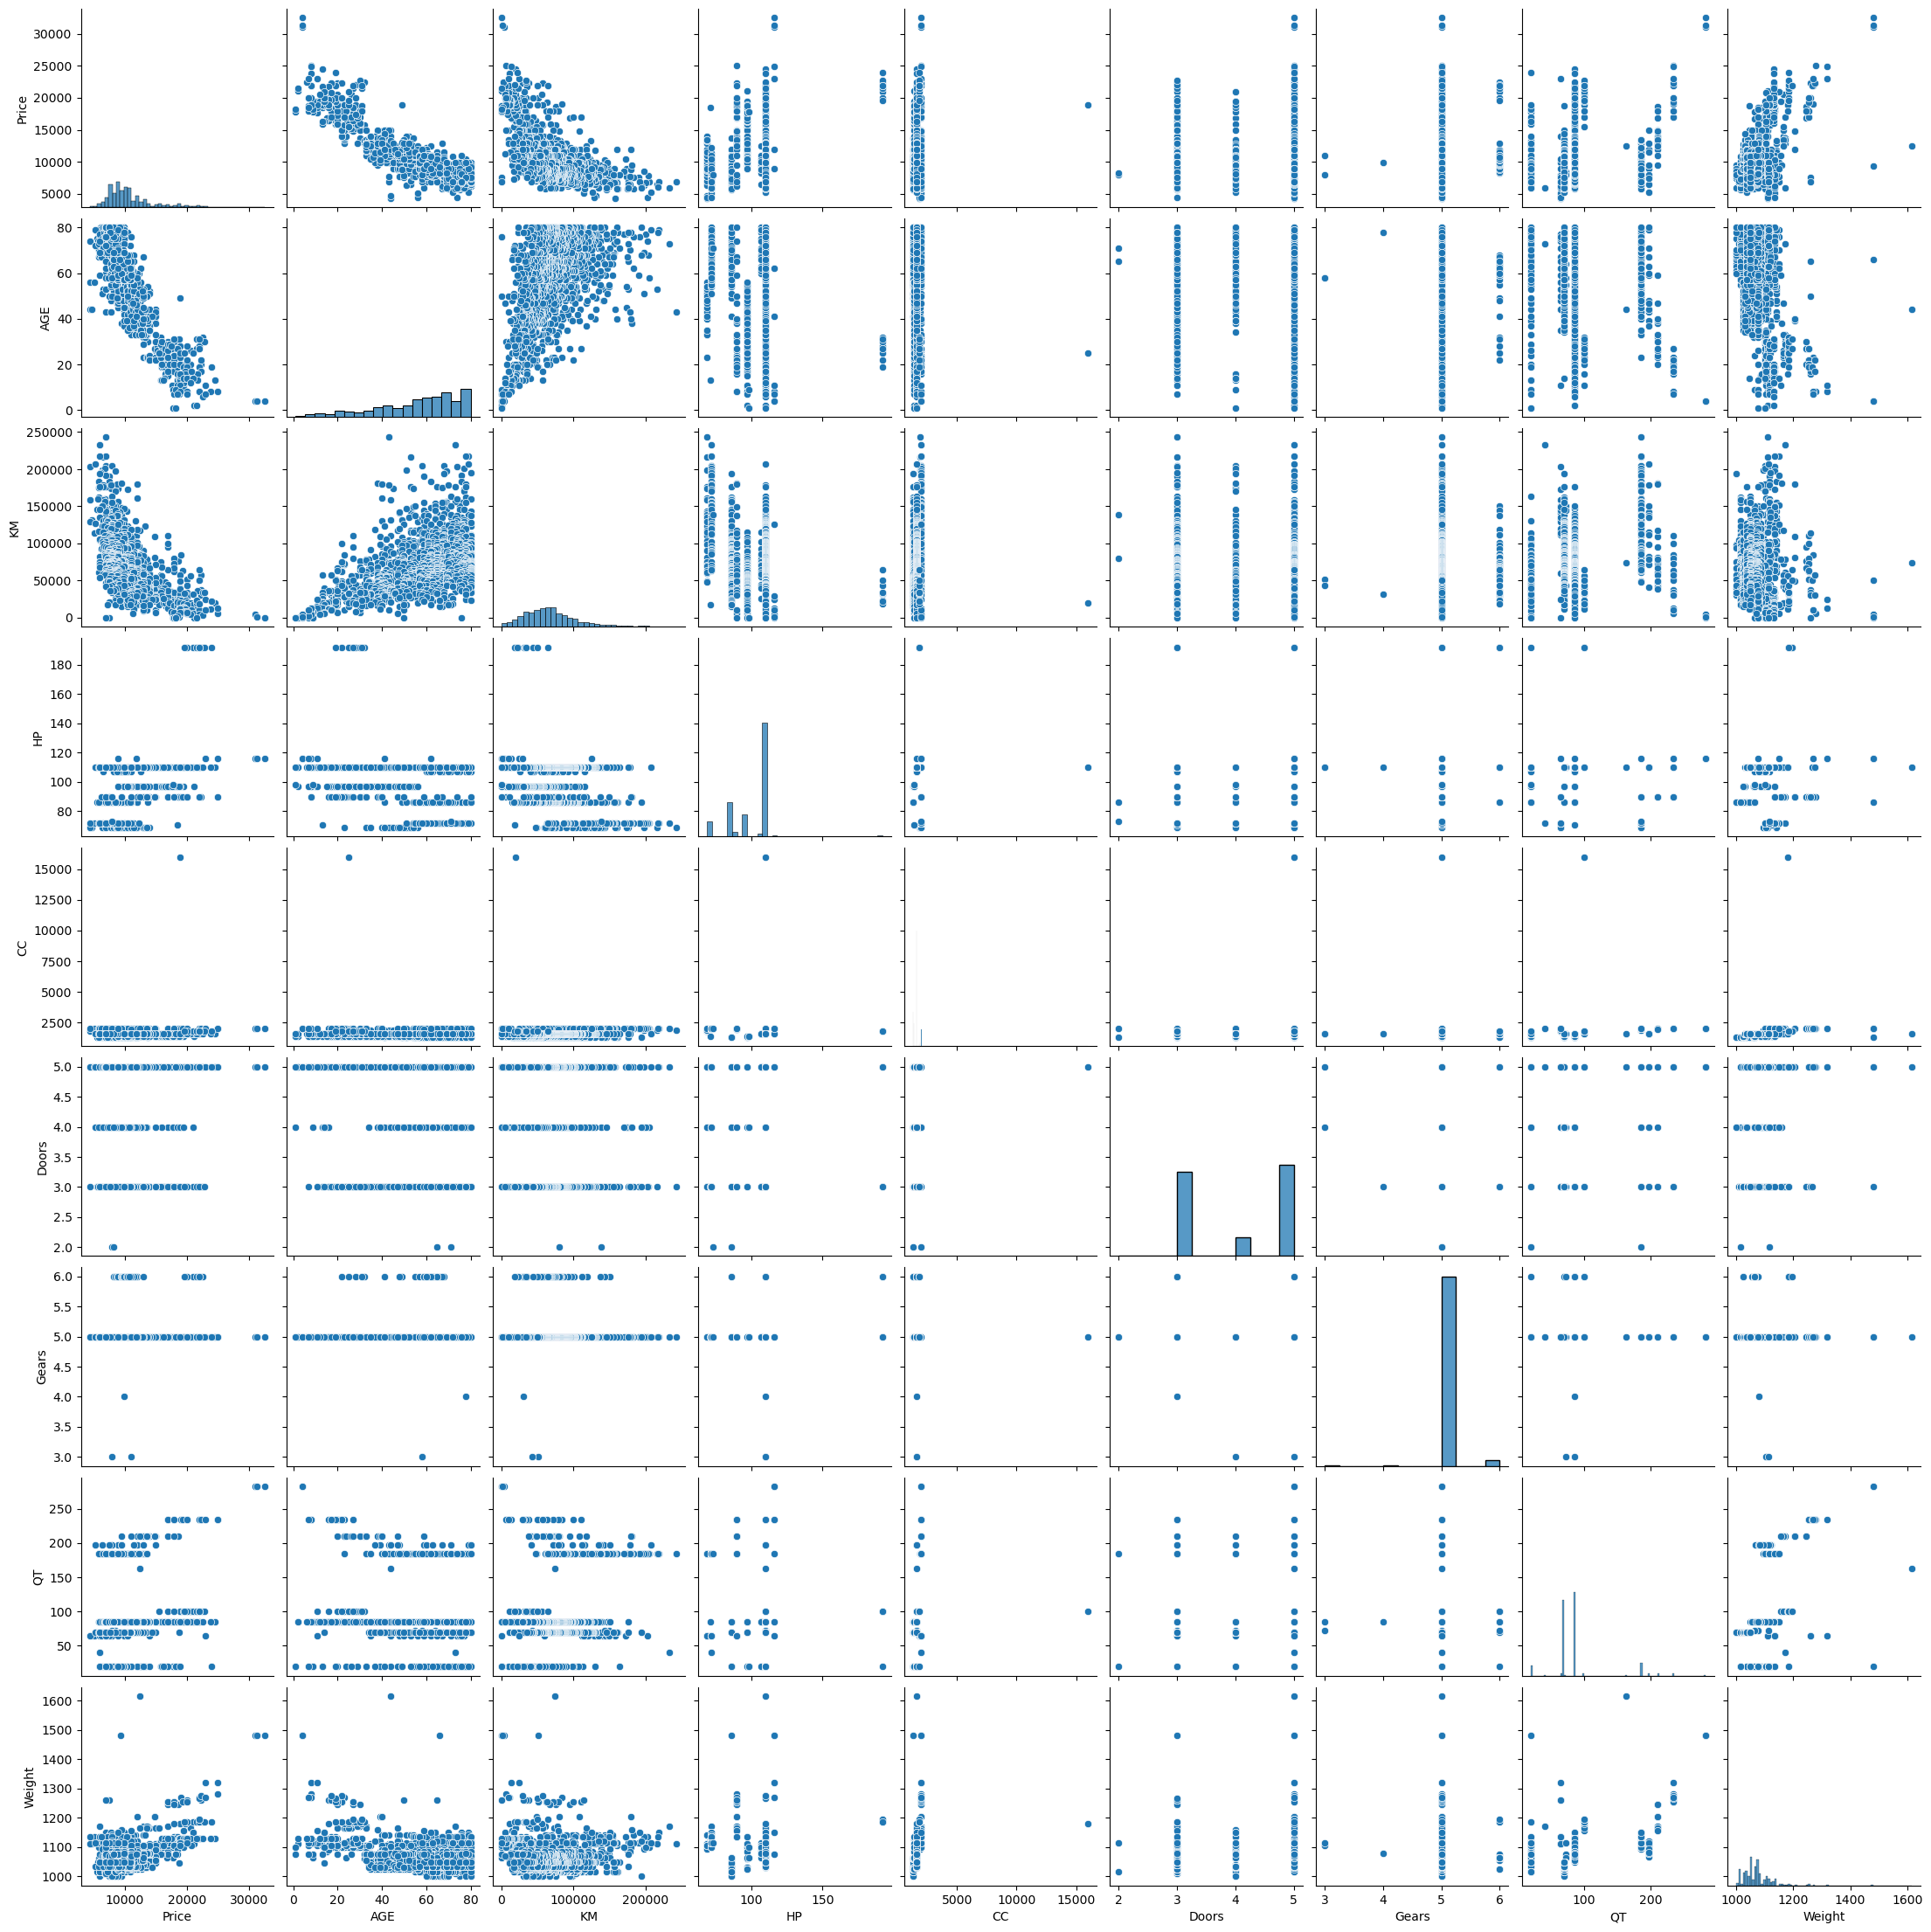

In [11]:
import seaborn as sns
sns.pairplot(df)